In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### create a toy dataset 

In [2]:
# made-up gene expression data
gene1 = [230,354,178,113,153,321]
gene2 = [171,84.5, 41.4,170,134,194]

toy_df = pd.DataFrame([gene1, gene2], 
             columns=['control1','control2','control3','treatment4','treatment5','treatment6'], 
             index=["gene1", "gene2"])

toy_df

,control1,control2,control3,treatment4,treatment5,treatment6
gene1,230,354.0,178.0,113,153,321
gene2,171,84.5,41.4,170,134,194


### Let's melt the table

In [3]:
# melt the wide table to a long table
melted_toy_df = toy_df.reset_index().melt(id_vars="index")
melted_toy_df

,index,variable,value
0,gene1,control1,230.0
1,gene2,control1,171.0
2,gene1,control2,354.0
3,gene2,control2,84.5
4,gene1,control3,178.0
5,gene2,control3,41.4
6,gene1,treatment4,113.0
7,gene2,treatment4,170.0
8,gene1,treatment5,153.0
9,gene2,treatment5,134.0


### Visualize one gene

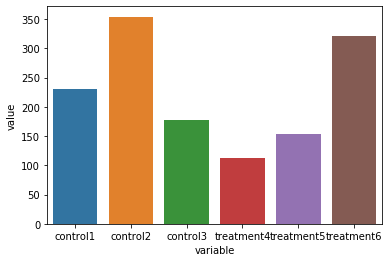

In [4]:
gene1_melted = melted_toy_df.loc[melted_toy_df["index"] == "gene1"]
sns.barplot(x="variable", y="value", data=gene1_melted)

### Visualize two genes

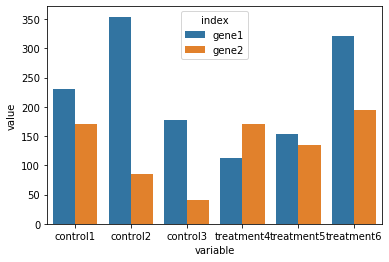

In [5]:
sns.barplot(x="variable", y="value", hue="index", data=melted_toy_df)

### We can draw a heatmap, with the color representing the gene abundance level 

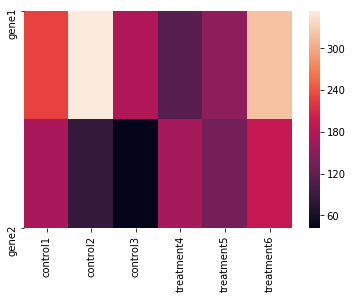

In [6]:
sns.heatmap(toy_df)

<br></br>
<br></br>
<br></br>
<br></br>

## Let's try **seaborn.FacetGrid** function. 

We are going to explore tips dataset. The FacetGrid function allows you to explore more than 2 dimensions at a time. 

Here we drew 4 subplots.

The first (0,0) subplot is <code>tip</code> and <code>total_bill</code> relationship, only for **male** cusomers at **lunch** time.  
The second (0,1) subplot is <code>tip</code> and <code>total_bill</code> relationship, only for **male** cusomers at **dinner** time.  
The third (1,0) subplot is <code>tip</code> and <code>total_bill</code> relationship, only for **female** cusomers at **lunch** time.  
The forth (1,1) subplot is <code>tip</code> and <code>total_bill</code> relationship, only for **female** cusomers at **dinner** time.

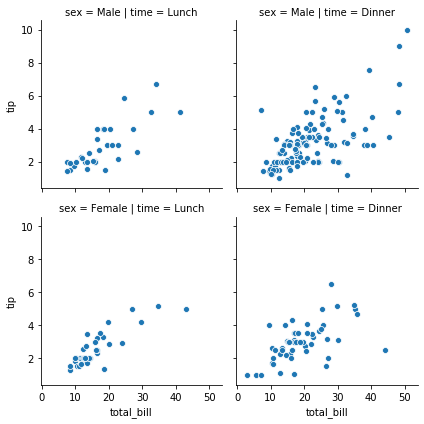

In [7]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

### Fit a linear model in seaborn

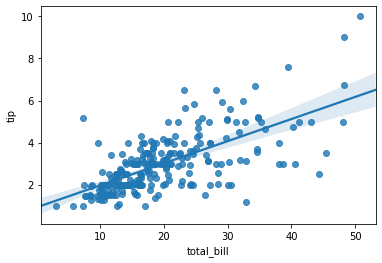

In [8]:
sns.regplot(x="total_bill", y="tip", data=tips);

### Linear model with conditions (smoker vs non-smoker)

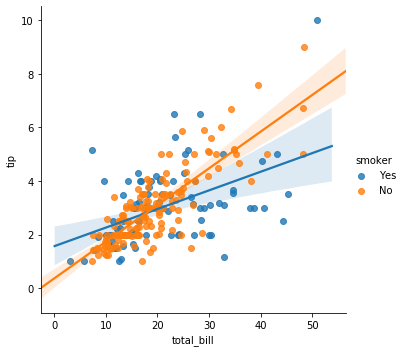

In [9]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);